# Newborns weight prediction according to pregnancy data

#### in this project a Regression model been built to predict newborns lengths according to a birth Dataset. 
#### the dataset contain information about parents health, I used thease data to make the prediction model. 

## Dataset Parameters : 

1. headcirumference : Baby's Head Circumference.
2. length           : Baby length (inches)
3. Birthweight      : Baby's weheight after birth.
4. Gestation        : Pregnancy period (weeks).
5. smoker           : is the mom smoker ? 0=non-smoker , 1=smoker. 
6. motherage        : Mother's age 
7. mnocig           : Mother's number of cigerattes per day. 
8. mheight          : Mother's height (inches). 
9. mppwt            : mother pre-pregnancy weight. 
10. fage            : Father's age. 
11. fedyrs          : Father's education years. 
12. fnocig          : Father's number of cigerattes per day.
13. fheight         : Father's height(inches).
14. lowbwt          : is the birth weight low ? 0=no , 1=yes. 
15. mage35          : is the mother's age is over 35 ? , 0= no , 1=yes. 
16. LowBirthWeight  : "Low" when the birth weight is low , "Normal" when birth weight is normal. 

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
# importing Dataset 
df=pd.read_csv('BirthweightNN.csv')
df.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17.0,5.8,33.0,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19.0,4.2,33.0,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19.0,6.4,34.0,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18.0,4.5,35.0,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18.0,5.8,35.0,1,20,35,67,125,23,12,50,73,1,0,Low


## Dataset cleaning : 

### Looking for duplicates : 

In [19]:
# how many duplicated we have ? 
print ("Number of duplicated : " ,df.duplicated().sum())
dupl = df[df.duplicated(keep=False)]
dupl.head(20)

Number of duplicated :  5


,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
108,1312,13,16.0,8.0,37.0,0,23,0,61,119,40,12,18,61,0,0,Normal
135,562,14,20.0,6.5,41.0,1,19,9,67,151,44,16,0,70,0,0,Normal
173,1918,13,22.0,9.0,43.0,0,33,0,71,153,36,13,0,71,0,0,Normal
176,1568,13,23.0,10.0,42.0,1,24,6,70,154,23,11,0,71,0,0,Normal
190,1002,13,21.0,7.4,37.0,1,21,18,70,154,23,14,10,68,0,0,Normal
253,1002,13,21.0,7.4,37.0,1,21,18,70,154,23,14,10,68,0,0,Normal
254,1568,13,23.0,10.0,42.0,1,24,6,70,154,23,11,0,71,0,0,Normal
255,562,14,20.0,6.5,41.0,1,19,9,67,151,44,16,0,70,0,0,Normal
256,1312,13,16.0,8.0,37.0,0,23,0,61,119,40,12,18,61,0,0,Normal
257,1918,13,22.0,9.0,43.0,0,33,0,71,153,36,13,0,71,0,0,Normal


**since all duplicated values are Copy-paste from the originals, we simply exclude them from our database.**  

In [21]:
#drop duplicates : 
df.drop_duplicates(inplace=True) 

### looking for missing values : 

In [28]:
na = df[df.isna().any(axis=1)]
na

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
83,627,13,23.0,NaN,41.0,0,23,0,70,160,38,12,12,69,0,0,Normal
93,1146,12,15.5,6.2,NaN,1,25,24,62,110,30,16,14,66,0,0,Normal
111,896,13,18.0,8.0,NaN,0,24,0,63,117,41,15,0,68,0,0,Normal
130,893,13,15.0,6.3,NaN,1,23,8,62,109,44,16,20,65,0,0,Normal
143,887,13,18.0,6.7,NaN,0,33,0,67,156,39,12,0,69,0,0,Normal
149,1255,13,18.0,6.6,NaN,0,35,0,67,157,40,14,23,66,0,1,Normal
155,1304,13,20.0,7.2,NaN,0,26,0,67,156,41,14,15,69,0,0,Normal
187,1962,14,22.0,9.0,NaN,1,20,7,68,158,34,14,0,73,0,0,Normal


**by looking to Null values, they are in Birthweight and Gestation columns , so according to data we can fill them by the mean value of each column.**

In [3]:
df['Gestation'].fillna(df.Gestation.mean(),inplace=True)
df['Birthweight'].fillna(df.Birthweight.mean(),inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 0 to 252
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                253 non-null    int64  
 1   headcirumference  253 non-null    int64  
 2   length            253 non-null    float64
 3   Birthweight       253 non-null    float64
 4   Gestation         253 non-null    float64
 5   smoker            253 non-null    int64  
 6   motherage         253 non-null    int64  
 7   mnocig            253 non-null    object 
 8   mheight           253 non-null    int64  
 9   mppwt             253 non-null    int64  
 10  fage              253 non-null    int64  
 11  fedyrs            253 non-null    int64  
 12  fnocig            253 non-null    int64  
 13  fheight           253 non-null    int64  
 14  lowbwt            253 non-null    int64  
 15  mage35            253 non-null    int64  
 16  LowBirthWeight    253 non-null    object 
dt

**Null+Duplicated values are cleaned !**
<br>

## looking for the best relattionships to build Regression model on it : 

<AxesSubplot:>

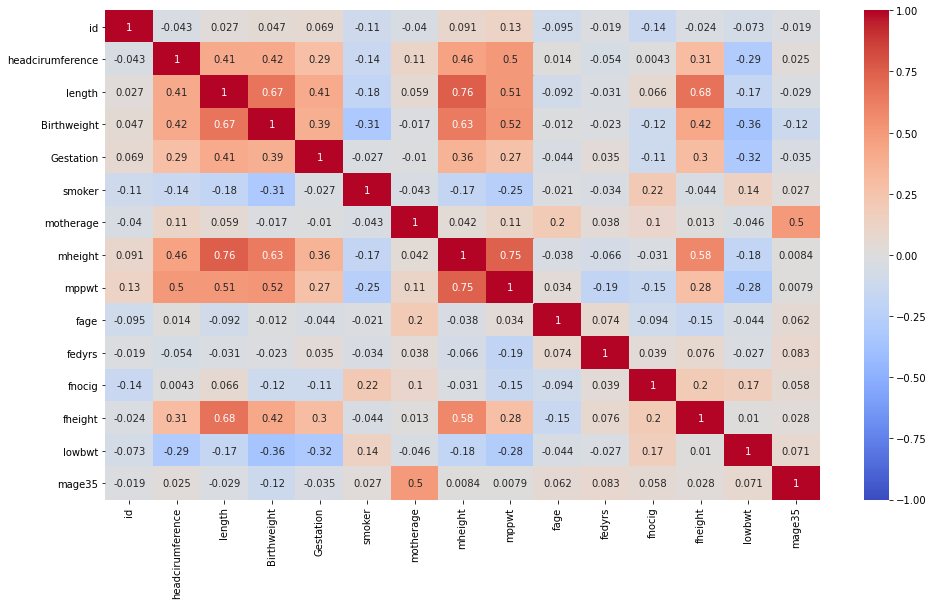

In [38]:
#  building a heatmap Matrix : 
corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, vmax=1,vmin=-1,center=0,cmap='coolwarm')


<br></br>
**by looking at the matrix above, we can easily notice that there is a strong relationship between fheight, Mheight and the length**  
**also we can notice that there are some week related data such as fage, and fnocig so we have to drop thease lines later**

so we start building our regresssion model : 

##  Multiple Linear Regression model 

In [4]:
x= df.iloc[:,[8,13]] # selecting mheight and fheight as a multiple regression parameters. 
y=df.iloc[:,2]       # selecting length as a target of regression . 

lr=LinearRegression()
lr.fit(x,y)
print("model intercept : ",lr.intercept_, "\t model coefficient : ", lr.coef_ )


model intercept :  -18.76555486505833 	 model coefficient :  [0.31932915 0.24968496]


In [5]:
# predicting some data : 

y_pred=lr.predict([[70,72]]) # what if the mothers length is 70 and the Fathers is 72 ? 
print(int(y_pred))

21


<br></br>

## Polynomial Regression model 

In [6]:

pr = PolynomialFeatures(degree=4)
x_pol=pr.fit_transform(x)

lr_pol =LinearRegression()
lr_pol.fit(x_pol,y)

print("intercept is : ",lr_pol.intercept_, "and coef. are : ", lr_pol.coef_)

intercept is :  -20018.70535566671 and coef. are :  [ 0.00000000e+00  5.34904296e+02  7.17368763e+02 -1.03172690e+01
 -5.05618447e+00 -1.39511976e+01  1.48317946e-01 -1.12081924e-01
  1.88745468e-01  7.97867611e-02 -1.33278863e-03  2.81148486e-03
 -3.12079636e-03  9.71906440e-04 -5.15285611e-04]


In [66]:
xpred= pr.fit_transform([[70,72]])
ypredicted = lr_pol.predict(xpred)
print(int(ypredicted))

21


<br>

## Evaluation of the multiple linear and ploynomial model 

In [44]:
# sklearn error, and score librarries imported in the first block . 
# multiple reg. evaluation : 
lr_pred=lr.predict(x)
print("============ Multiple Linear Reg. ================")
print("R2 score : ",r2_score(y,lr_pred))
print("Mean Absolute Error : ", mean_absolute_error(y,lr_pred))
print("Mean squared Error : ",mean_squared_error(y,lr_pred))
print("==================================================")
print("\n")
pol_pred=lr_pol.predict(x_pol)
print("=========== Polynomial Linear Reg. ===============")
print("R2 score : ",r2_score(y,pol_pred))
print("Mean Absolute Error : ", mean_absolute_error(y,pol_pred))
print("Mean squared Error : ",mean_squared_error(y,pol_pred))
print("==================================================")

============ Multiple Linear Reg. ================
R2 score :  0.6639902974381129
Mean Absolute Error :  1.0218853560816563
Mean squared Error :  1.5967169051692855


=========== Polynomial Linear Reg. ===============
R2 score :  0.7025474183857519
Mean Absolute Error :  0.940606559729414
Mean squared Error :  1.4134936042873334


<br>

## Decision tree

**To Avoid un-Accuratre R2 score because of model use same data for training and testing purposes we have to split data into 2 seperated datasets one for training and another for testing** 

In [35]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split


df = pd.read_csv('BirthweightNN.csv')
x=df.iloc[:,[8,13]]
y=df.iloc[:,2]
# splitting Dataset into 2 different groups  
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,random_state=42)

treeReg= DecisionTreeRegressor(random_state=42)
treeReg.fit(x_train,y_train)

# predicting X_test group with Decision Tree we made. 
tree_pred = treeReg.predict(x_test)
print('================results================')
print('R2 score : ',r2_score(y_test,tree_pred))
print('Mean absulote Error : ',mean_absolute_error(y_test,tree_pred))
print('Mean squared Error : ',mean_squared_error(y_test,tree_pred))
print('=======================================')


================results================
R2 score :  0.5859661540739094
Mean absulote Error :  1.0801282051282053
Mean squared Error :  2.2065064102564107


## Random Forest 

In [42]:
from sklearn.ensemble import RandomForestRegressor
RandF = RandomForestRegressor(n_estimators=100, random_state=42)
RandF.fit(x_train,y_train)

# Predicting values using Random Forest we made
Forest_pred = RandF.predict(x_test)
print('================results================')
print('Forest R2 score : ',r2_score(y_test,Forest_pred))
print('Forest Mean absulote Error : ',mean_absolute_error(y_test,Forest_pred))
print('Forest Mean squared Error : ',mean_squared_error(y_test,Forest_pred))
print('=======================================')

================results================
Forest R2 score :  0.7153408222792648
Forest Mean absulote Error :  0.8718366135187863
Forest Mean squared Error :  1.5170312923915987


## Evaluation of Tree and forest model 

**Decision Tree and Random Forest Scores :**

In [43]:
tree_pred = treeReg.predict(x_test)
print('================results================')
print('R2 score : ',r2_score(y_test,tree_pred))
print('Mean absulote Error : ',mean_absolute_error(y_test,tree_pred))
print('Mean squared Error : ',mean_squared_error(y_test,tree_pred))
print('=======================================')
print('\n')
Forest_pred = RandF.predict(x_test)
print('================results================')
print('Forest R2 score : ',r2_score(y_test,Forest_pred))
print('Forest Mean absulote Error : ',mean_absolute_error(y_test,Forest_pred))
print('Forest Mean squared Error : ',mean_squared_error(y_test,Forest_pred))
print('=======================================')


================results================
R2 score :  0.5859661540739094
Mean absulote Error :  1.0801282051282053
Mean squared Error :  2.2065064102564107


================results================
Forest R2 score :  0.7153408222792648
Forest Mean absulote Error :  0.8718366135187863
Forest Mean squared Error :  1.5170312923915987


## Discussion 

After applying a fast data claening on the dataset, and developing MultiLinear Regression, Polynomial Regression, Decision Tree and Random forest model and applying it on the dataset, I got a model that could predict results with an accuracy of %69 -%71 .
according to the dataset used, it is a good results. 